<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"   width="150" align="right">

# Lista 3 - Embeddings

______________


O objetivo desta lista é fazer com que vocês treinem um modelo de análise de sentimentos utilizando um embedding. O modelo final será criado na seção "montando o modelo", mas até lá vamos passar pelas seguintes etapas:  
 - Importando os dados como um dataframe
 - Pré Processamento
 - Separando em teste e treino
 - Tokenizando


Após montar e treinar seu modelo você tambem poderá fazer uma questão extra para ganhar nota extra nessa lista, deixar de fazer esse exercicio não prejudicará sua nota.



In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.15.0'

### Importando os dados como um dataframe

Para esta lista nós utilizaremos um recorte do dataset **B2W-Reviews01** que consiste em avaliações de mais de 130k compras online no site Americanas.com e [esta disponivel no github](https://github.com/b2wdigital/b2w-reviews01) sob a licensa CC BY-NC-SA 4.01.

In [3]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [4]:
!curl https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/Semana%2003/data/b2w-10k.csv --output 'data/b2w-10k.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3919k  100 3919k    0     0  7865k      0 --:--:-- --:--:-- --:--:-- 7854k


In [5]:
b2wCorpus = pd.read_csv("data/b2w-10k.csv")
b2wCorpus.head()

submission_date                                        reviewer_id  \
0  2018-01-01 00:11:28  d0fb1ca69422530334178f5c8624aa7a99da47907c44de...   
1  2018-01-01 00:13:48  014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...   
2  2018-01-01 00:26:02  44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...   
3  2018-01-01 00:35:54  ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...   
4  2018-01-01 01:00:28  7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...   

   product_id                                       product_name  \
0   132532965  Notebook Asus Vivobook Max X541NA-GO472T Intel...   
1    22562178               Copo Acrílico Com Canudo 500ml Rocie   
2   113022329  Panela de Pressão Elétrica Philips Walita Dail...   
3   113851581               Betoneira Columbus - Roma Brinquedos   
4   131788803  Smart TV LED 43" LG 43UJ6525 Ultra HD 4K com C...   

    product_brand      site_category_lv1       site_category_lv2  \
0             NaN            Informática                Notebook   
1             NaN  Utilidades Domésticas  Copos, Taças e Canecas   
2  philips walita        Eletroportáteis         Panela Elétrica   
3     roma jensen             Brinquedos   Veículos de Brinquedo   
4              lg      TV e Home Theater                      TV   

                       review_title  overall_rating recommend_to_a_friend  \
0                               Bom               4                   Yes   
1  Preço imbatível, ótima qualidade               4                   Yes   
2      ATENDE TODAS AS EXPECTATIVA.               4                   Yes   
3        presente mais que desejado               4                   Yes   
4            Sem duvidas, excelente               5                   Yes   

                                         review_text reviewer_birth_year  \
0  Estou contente com a compra entrega rápida o ú...                1958   
1  Por apenas R$1994.20,eu consegui comprar esse ...                1996   
2  SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...                1984   
3  MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...                1985   
4  A entrega foi no prazo, as americanas estão de...                1994   

  reviewer_gender reviewer_state Unnamed: 14 Unnamed: 15 Unnamed: 16  \
0               F             RJ         NaN         NaN         NaN   
1               M             SC         NaN         NaN         NaN   
2               M             SP         NaN         NaN         NaN   
3               F             SP         NaN         NaN         NaN   
4               M             MG         NaN         NaN         NaN   

  Unnamed: 17 Unnamed: 18  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

In [6]:
b2wCorpus["review_text"]

0       Estou contente com a compra entrega rápida o ú...
1       Por apenas R$1994.20,eu consegui comprar esse ...
2       SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3       MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4       A entrega foi no prazo, as americanas estão de...
                              ...                        
9994    Celular muito rápido, com processador e armaze...
9995    achei o produto muito frágil, o material veio ...
9996    Uma porcaria pois ñ recebi ñ recomendo pra nin...
9997    Maquina excelente,super pratica. recomendo.ent...
9998    Agradeço pelo compromisso, obrigado. ,...........
Name: review_text, Length: 9999, dtype: object


### Pré-processamento
Seria util nos livrarmos das colunas que não são relevantes para o nosso problema e tambem verificar se não tem nada de esquisito nas colunas que vamos utilizar.
Por exemplo, se fossemos utilizar a coluna "reviewer_gender" nós precisariamos nos livrar desses valores esquisitos:

In [7]:
b2wCorpus["reviewer_gender"].value_counts()

M                                                                         5033
F                                                                         4624
                                                                             1
1970                                                                         1
Ocorrência: Z-Devolução Em Andamento Ao Cd de São Paulo 22/12/17 16:12       1
Name: reviewer_gender, dtype: int64

## <font color='blue'>Questão 1 </font>

a) Selecione apenas as colunas relevantes: "review_text" e "recommend_to_a_friend".

b) Converta a coluna "recommend_to_a_friend" de uma coluna de `str` para uma coluna de `int`:

- "Yes"-> 1
- "No" -> 0


In [8]:
b2wCorpus_copy = b2wCorpus[["review_text", "recommend_to_a_friend"]].copy()
b2wCorpus_copy["recommend_to_a_friend"] = b2wCorpus_copy["recommend_to_a_friend"].map({"Yes": 1, "No":0})
b2wCorpus_copy

review_text  recommend_to_a_friend
0     Estou contente com a compra entrega rápida o ú...                      1
1     Por apenas R$1994.20,eu consegui comprar esse ...                      1
2     SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...                      1
3     MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...                      1
4     A entrega foi no prazo, as americanas estão de...                      1
...                                                 ...                    ...
9994  Celular muito rápido, com processador e armaze...                      1
9995  achei o produto muito frágil, o material veio ...                      0
9996  Uma porcaria pois ñ recebi ñ recomendo pra nin...                      0
9997  Maquina excelente,super pratica. recomendo.ent...                      1
9998  Agradeço pelo compromisso, obrigado. ,...........                      1

[9999 rows x 2 columns]

### Separando em teste e treino
## <font color='blue'>Questão 2 </font>

Agora com o dataset já pré-processado, separe o em 2 partes, um conjunto de teste e um conjunto de treino. Novamente você pode utilizar a função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn como na lista passada.

In [9]:
from sklearn.model_selection import train_test_split

random_state = 42
test_size = 0.25

x_values = b2wCorpus_copy["review_text"]
y_values = b2wCorpus_copy["recommend_to_a_friend"]

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, random_state=random_state, test_size=test_size)

### Tokenizando

Para alimentarmos os reviews a camada de embedding nós precisamos quebrar cada review em uma serie de tokens. Existem diversas maneiras de se realizar isso e poderiamos até mesmo usar outras bibliotecas como o spaCy.

Por exemplo, o objeto [`Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) oferece um método `tokenize` para quebrar as palavras em tokens individuais ao mesmo tempo que filtra caracteres indesejados (por default os caracteres filtrados são: !"#$\%&()*+,-./:;<=>?@[\\]^_\`{|}~\t\n).


Para essa lista utilizaremos a camada [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) para automaticamente passar os reviews para caixa-baixa, extrair caracteres especiais e tokenizar as palavras de maneira a serem passadas para a camada de embedding. Ao tornarmos a etapa de tokenização uma camada de rede neural nós podemos incluir esse processamento dos reviews no proprio modelo.


## <font color='blue'>Questão 3 </font>
Utilizando a camada `TextVectorization` tokenize os inputs.
Declare a camada e então chame a função `adapt()` para adequar o seu vocabulário aos reviews.

Não se esqueça de se certificar que todas os reviews tenham o mesmo comprimento, seja por meio do uso de padding, truncamento ou uma mistura dos dois. Plotamos um histograma do comprimento dos reviews para lhe auxiliar nessa decisão.

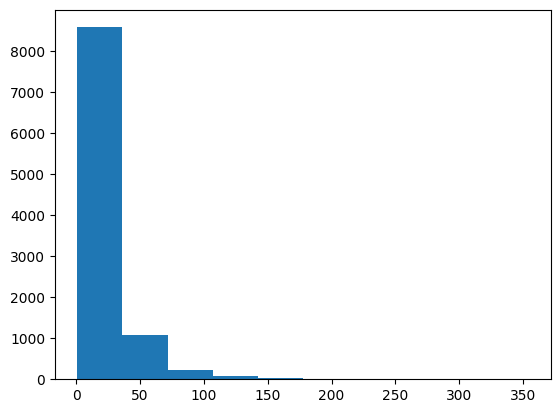

In [10]:
plt.hist([len(linha.split()) for linha in b2wCorpus["review_text"]])
plt.show()

In [11]:
import tensorflow as tf

# Exibe as GPUs disponíveis (deve exibir pelo menos uma GPU)
physical_devices = tf.config.list_physical_devices('GPU')
print("GPUs disponíveis:", physical_devices)

# Configuração para alocar memória de forma dinâmica
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

GPUs disponíveis: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
from tensorflow.keras.layers import TextVectorization

# Criar a camada TextVectorization
output_sequence_length = 10000
vectorizer = TextVectorization(output_mode='tf-idf') #, output_sequence_length=output_sequence_length)

# Adaptar o vetorizador aos dados de treinamento
vectorizer.adapt(x_train)

# Verificar o vocabulário criado pelo vetorizador
vocab = vectorizer.get_vocabulary()
# print("Vocabulário:", vocab)

# Vetorizar os dados de treinamento
vectorized_train_data = vectorizer(x_train).numpy()
vectorized_train_data

array([[0.       , 2.2734647, 3.2161298, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.1367323, 1.0720433, ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 2.2734647, 0.       , ..., 8.229645 , 0.       ,
        0.       ],
       [0.       , 1.1367323, 2.1440866, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.1367323, 1.0720433, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

### Montando o modelo

Agora vamos juntar a camada do tokenizador a nossa camada [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) e definir o resto de nosso modelo.

##  <font color='blue'>Questão 4 </font>

Defina seu modelo.

Como analise de sentimentos pode ser visto como um problema de classificação, é interessante também registrar algumas métricas como acurácia `metrics=["acc"]` .

Seu modelo deve começar com a seguinte estrutura:
 - Camada de Input
 - Camada de Tokenização
 - Camada de Embedding

Já definimos as camadas seguintes da rede por você.

Atenção a dimensão do input da camada de embedding, lembre se que < OOV > e < PAD > possuem seus próprios tokens.


In [13]:
import tensorflow as tf

# criando o modelo
input_len = len(vectorized_train_data[0])
output_dim = 10

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(vocab), output_dim=output_dim, input_length=input_len),

    # Conv1D + global max pooling
    tf.keras.layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3),
    tf.keras.layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3),
    tf.keras.layers.GlobalMaxPooling1D(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Treinando e avaliando seu modelo

##  <font color='blue'>Questão 5 </font>

Com seu modelo definido, treine e avalie sua performance no conjunto de testes.



In [14]:
# Treinar o modelo
model.fit(vectorized_train_data, y_train, epochs=20)

# Avaliar o modelo
vectorized_test_data = vectorizer(x_test).numpy()
accuracy = model.evaluate(vectorized_test_data, y_test)[1]
print(f"Acurácia do modelo nos dados de teste: {accuracy}")

Epoch 1/20
235/235 [==============================] - 13s 36ms/step - loss: 0.5190 - accuracy: 0.7558
Epoch 2/20
235/235 [==============================] - 6s 27ms/step - loss: 0.4283 - accuracy: 0.8053
Epoch 3/20
235/235 [==============================] - 7s 29ms/step - loss: 0.3979 - accuracy: 0.8189
Epoch 4/20
235/235 [==============================] - 6s 26ms/step - loss: 0.3742 - accuracy: 0.8306
Epoch 5/20
235/235 [==============================] - 6s 28ms/step - loss: 0.3565 - accuracy: 0.8381
Epoch 6/20
235/235 [==============================] - 6s 26ms/step - loss: 0.3450 - accuracy: 0.8440
Epoch 7/20
235/235 [==============================] - 6s 28ms/step - loss: 0.3325 - accuracy: 0.8526
Epoch 8/20
235/235 [==============================] - 6s 27ms/step - loss: 0.3171 - accuracy: 0.8630
Epoch 9/20
235/235 [==============================] - 6s 27ms/step - loss: 0.3027 - accuracy: 0.8686
Epoch 10/20
235/235 [==============================] - 6s 27ms/step - loss: 0.2924 - accur

##  <font color='green'>Questão Extra </font>

### Vizualizando o embedding
Agora que temos um embedding treinado em nossa tarefa de analise de sentimentos, podemos tentar vizualisar este embedding. O [embedding projector](https://projector.tensorflow.org/) nos permite visualiza-los de maneira mais intuitiva.

Para carregar seu próprio embedding você precisará fornecer 2 arquivos, um com os embeddings propriamente ditos e outro com os métadados (no nosso caso, um string que representa a palavra).


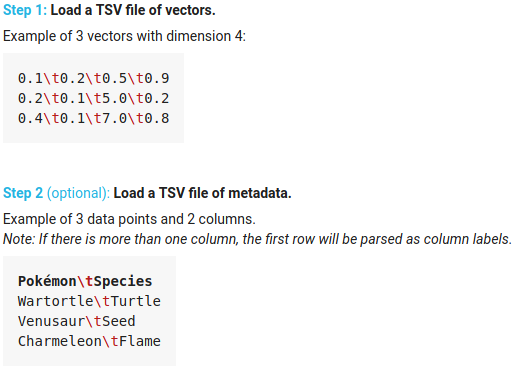

Esse [guia](https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin) pode ser util para entender melhor como extrair essas informações.

In [ ]:
# Seu código aqui

Procure por palavras com conotações tradicionalmente positivas e negativas, elas estão proximas ou distantes?
Usando a visualização PCA, você consegue notar alguma característica interessante sobre como as palavras estão distribuidas nesse espaço?


**<font color='red'> Sua resposta aqui </font>**